In [0]:
from IPython.display import clear_output
clear_output()

In [3]:
!git clone https://github.com/daniarnaizg/text-detector-ocr.git

Cloning into 'text-detector-ocr'...
remote: Counting objects: 71, done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 71 (delta 0), reused 2 (delta 0), pack-reused 68
Unpacking objects: 100% (71/71), done.
Checking out files: 100% (21/21), done.


In [4]:
!ls text-detector-ocr/Resources/datasets/

cifar10-png.zip  MSRA-TD500.zip


In [0]:
# Get Char74k dataset
!wget http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishImg.tgz;
!tar -xzvf EnglishImg.tgz
from IPython.display import clear_output
clear_output()

In [0]:
!mkdir dataset

In [0]:
'''
Every image is moved to a foder named after its class. Each image's name contains
the class it corresponds to.
'''
import os

paths = ['English/Img/GoodImg/Bmp', 'English/Img/BadImag/Bmp']

for path in paths:  
  folders = os.listdir(path)
  for folder in folders:
    folder_path = path + '/' + folder
    files = os.listdir(folder_path)
    for file in files:
      file_class = file[:6][-2:]
      dir = 'dataset/' + str(file_class)
      if not os.path.exists(dir):
        os.mkdir(dir)
      os.rename(folder_path + '/' + file, dir + '/' + file)
  

In [9]:
!ls dataset/

01  05	09  13	17  21	25  29	33  37	41  45	49  53	57  61
02  06	10  14	18  22	26  30	34  38	42  46	50  54	58  62
03  07	11  15	19  23	27  31	35  39	43  47	51  55	59
04  08	12  16	20  24	28  32	36  40	44  48	52  56	60


In [0]:
'''
Function to get a char according to the predicted class.
'''
import string
chars = list(string.digits) + list(string.ascii_uppercase) + list(string.ascii_lowercase)
def get_char(index):
  return chars[index-1]

In [11]:
import matplotlib.pyplot as plt

import numpy as np
import glob
import cv2
import os

from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers import Flatten, Lambda, BatchNormalization
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
'''Config of the model'''

EPOCHS = 10     # Number of training epochs
INIT_LR = 1e-3  # Initial Learning rate
BS = 32         # Batch size

data = []
labels = []

In [0]:
'''
Extraction of the data and label of every image.
'''
for folder in os.listdir('dataset/'):
  dir = 'dataset/' + folder + '/*.png'
  class_dir = glob.glob(dir)
  for imagePath in class_dir:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    data.append(image)
    labels.append(folder) # The label is the  folder each image is in

In [0]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [0]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [17]:
trainX.shape

(5815, 28, 28, 3)

In [18]:
trainY.shape

(5815,)

In [0]:
# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=63)
testY = to_categorical(testY, num_classes=63)

In [20]:
trainY.shape

(5815, 63)

In [0]:
'''Initialization of the model'''
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(63, activation='softmax'))

optimizer = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [24]:
!ls text-detector-ocr/Models

char74k_OCR.h5	emnist-model-1.h5  text-notext.h5


In [0]:
model_path = 'text-detector-ocr/Models/char74k_OCR.h5'

In [0]:
# Load the model so it isn´t necessary to train it everytime
model.load_weights(model_path)

In [27]:
'''Train the network'''
# model.fit(trainX, trainY, batch_size=BS, validation_data=(testX, testY), epochs=EPOCHS, verbose=1)
# model.save(model_path)

score = model.evaluate(testX, testY, verbose=1)

print('Test loss: ' + str(score[0]))
print('Test accuracy: ' + str(score[1]))

1939/1939 [==============================] - 1s 487us/step
Test loss: 0.021051942340572387
Test accuracy: 0.9935329372333214




---



In [0]:
# EVALUACION

# load the image
image = cv2.imread('dataset/18/img018-00039.png')
orig = image.copy()

# pre-process the image for classification
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

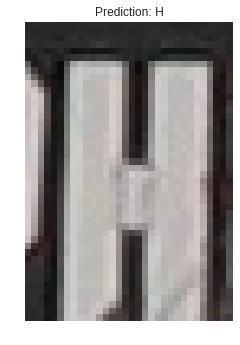

In [29]:
predictions = model.predict(image)[0]
prediction = get_char(predictions.argmax())

plt.title("Prediction: " + prediction)
plt.imshow(orig)
plt.axis('off')
plt.show()